In [1]:
import json
import sys
import gzip
import textstat
import numpy as np
import pandas as pd
import readability
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from scipy.stats import kde

In [2]:
input_name = 'dblp1-test.json.gz'
sample = 10;
name        = 'dblp1-test'
input_name = 'dblp1.json.gz'
sample = 50;
name        = 'dblp1'
input_name  = f'{name}.json.gz'
output_name = f'{name}-every{sample}.json'

data = []

# using `with`
counter = 1
with gzip.open(input_name) as f:
    for i in f:
        counter -= 1
        if counter == 0:
            counter = sample
            i = i.decode('utf-8')
            data.append(json.loads(i))

with open(output_name, 'w', encoding='utf-8') as f_out:
    for i in data:
        json.dump(i, f_out)
        f_out.write('\n')

# Corpus stays json per line, so either parse this one by one, or (memory permitting) with dataframes.
# so read with pd.read_json(source, lines=True)  and pd.json_normalize(data['_source'], max_level=2)

In [5]:
# Total abstracts 
print(len(data))

69655


In [4]:
# removing empty abstracts
clean_data = []
for line in data:
    if len(line['_source']['abstract']) == 0 or len(line['_source']['abstract']) > 1250:
        data.remove(line)
    else:
        clean_data.append(line)

In [6]:
# after removing the empty abstracts and the abstracts that are 
# too long(>1250), there are 56710 abstracts left
print(len(clean_data))

60851


In [7]:
# tokenizing abstracts and calculating readability scores
fers = [] # fers = flesch ease reading score
for line in clean_data:
    abstract = line['_source']['abstract']
    abstract = word_tokenize(abstract)
    score = readability.getmeasures(abstract, lang='en')
    fers.append(score['readability grades']['FleschReadingEase'])

In [96]:
print(clean_data[19000]['_source']['abstract'])
fers[19000]['readability grades']['FleschReadingEase']

This paper describes how the early visual process of contour organisation can be realised using the EM algorithm. The underlying computational representation is based on fine spline coverings. According to our EM approach the adjustment of spline parameters draws on an iterative weighted least-squares fitting process. The expectation step of our EM procedure computes the likelihood of the data using a mixture model defined over the set of spline coverings. These splines are limited in their spatial extent using Gaussian windowing functions. The maximisation of the likelihood leads to a set of linear equations in the spline parameters which solve the weighted least squares problem. We evaluate the technique on the localisation of road structures in aerial infra-red images. 


57.29319561157797

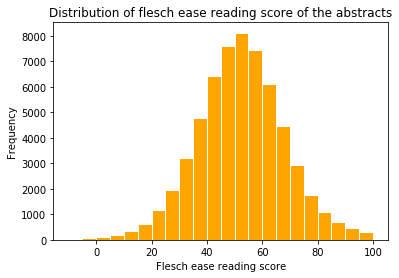

In [8]:
# distribution flesch ease reading score of 50000+ abstracts
bins = [-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.hist(fers, bins=bins, color='orange', edgecolor='w')
plt.xlabel('Flesch ease reading score')
plt.ylabel('Frequency')
plt.title('Distribution of flesch ease reading score of the abstracts')
plt.show()

In [9]:
# Gemiddelde flesh reading ease score
average_fers = sum(fers) / len(fers)
average_fers

52.91721031699326

In [47]:
print(data[1]['_source']['abstract'])

{'abstract': 'Humanoid robots should be able to interact with humans in a familiar way since they are going to play a significant role in the future. Thus, it is necessary that Human-Robot Interaction (HRI) is designed in such a way that allows humans to communicate with robots effortlessly and naturally. Emotions play an important role in this interaction since humans feel more predisposed to interact with robots if they are able to create an affective bond with them. In this study, we want to know whether humans are able to empathize with a humanoid robot. Therefore, in the present research, we are going to recreate a Milgram experiment in which we expect participants to empathize with the robot while playing a matching game. Like in Milgram’s experiment, they will have to give fake electrical shocks to the robot thinking that they are punishing it. In that way, an empathic state, which we expect to see in our results, may be induced. ',
 'author': {'id': '', 'name': '', 'org': ''},
